In [1]:
using Graphs, MetaGraphsNext
includet("../../utils/visu.jl")
includet("io.jl")

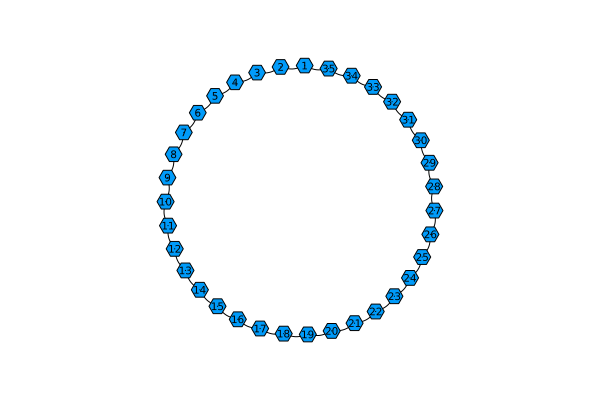

In [65]:
g = cycle_graph(35)
visu_graph(g)

In [66]:
mg = get_mg_from_g(g, "C_30")
write_network_to_json(mg)

2409

In [4]:
function generate_cycle_of_cliques(n, m)
    
    g = Graph()  # Main graph to hold the cycle of cliques

    # Store the central nodes of each clique (that will form the cycle)
    cycle_nodes = []

    # Create each clique
    for i in 1:n
        for j in 1:m
            add_vertex!(g)
        end
        for node_1 in (1+m*(i-1)):(i*m - 1)
            for node_2 in (node_1+1):(i*m)
                add_edge!(g, node_1, node_2)
            end
        end
    end

    # create cycle
    for i in 1:(n-1)
        add_edge!(g, 1+(i-1)*(m), 1+i*m)
    end
    add_edge!(g, 1, 1 + (n-1)*m)

    return g
end


generate_cycle_of_cliques (generic function with 2 methods)

In [ ]:
function generate_cycle_of_cliques(n, m)
    
    g = Graph()  # Main graph to hold the cycle of cliques

    # Store the central nodes of each clique (that will form the cycle)
    cycle_nodes = []

    # Create each clique
    for i in 1:n
        for j in 1:m
            add_vertex!(g)
        end
        for node_1 in (1+m*(i-1)):(i*m - 1)
            for node_2 in (node_1+1):(i*m)
                add_edge!(g, node_1, node_2)
            end
        end
    end

    # create cycle
    for i in 1:(n-1)
        add_edge!(g, 1+(i-1)*(m), 1+i*m)
    end
    add_edge!(g, 1, 1 + (n-1)*m)

    return g
end

In [7]:
function get_mg_from_g(g, name)

    mg = MetaGraph(
        Graph(),
        Int,
        Dict,
        Dict,
        Dict(:name=>name, :type=>"virtual", :directed=> false)
    )

    for node in vertices(g)
        add_vertex!(mg, node, Dict(:dem=> 1))
    end
    for edge in edges(g)
        add_edge!(mg, src(edge), dst(edge), Dict(:dem=>1))
    end

    return mg
end

get_mg_from_g (generic function with 1 method)

2033